<h1><center><b> Acquired Intelligence & Adaptive Behaviour </b></center></h1>
<h2><center><i>Course Work 1  (coding part) </i></center></h2>

<center>Candidate no: 246743</center>



# TASK
Write a report that examines the effects of mutation rate, crossover probability, tournament size or any other parameter of the GA, on performance. To make this study meaningful you might need to use genotypes bigger than the ones presented in the lab sheet (e.g. try a genotype with 30-50 genes). 
<br/><br/>

--<b>Minimal required  technical achievements</b>
<br/><br/>

* A plot of tournaments versus fitness (where this is the fitness of the best individual in the population).

* A plot of how the fitness of the best individual after X number of tournaments (choose an appropriate X)  changes with a GA parameter of your choice (e.g mutations rate).  Make sure your average over several runs and indicate both the mean and spread (standard error in the mean) of your value.



In [ ]:
import numpy as np
import random as rand
import copy as cp
import matplotlib.pyplot as plt
from scipy.stats import sem 

# knapsack problem data from google
num_genes = 50
max_volume = 850
benefits = [
    360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147,
    78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28,
    87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276,
    312
]
volumes = [
    7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0,
    42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71,
    3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13
]

In [ ]:
def fitness_function(genotype, benefits, volumes, max_volume):
  
  # initialize benefits and volumes to 0
  total_benefits = 0
  total_volumes = 0

  # go through the whole genotype, update benefits and volumes
  for i in range(len(genotype)) :
    total_benefits += genotype[i] * benefits[i]
    total_volumes += genotype[i] * volumes[i]
  
  # when the volume overflows, return 0
  if total_volumes > max_volume :
    return 0

  return total_benefits # a single number saying how good the geneotype is

In [ ]:
def mutate (genotype, prob=0.5):

  # initialization
  copy = cp.deepcopy(genotype)
  idx = np.random.randint(0,9)

  # convert the current value if its in the probability
  if np.random.uniform(0,1) < prob:
    copy[idx] ^= 1 

  # get the fitness value for both original and mutated one
  origin = fitness_function(genotype, benefits, volumes, max_volume)
  mutated = fitness_function(copy, benefits, volumes, max_volume)

  # always return the bigger one 
  if (origin >= mutated):
    return genotype

  return copy

In [ ]:
def crossover(winner, loser, prob=0.9):
  
  # go through the whole genotype, every gene have the prob to change
  for i in range(len(loser)):
    if np.random.uniform(0,1) < prob:
      loser[i] = winner[i]

  return loser

# Full GA


In [ ]:
def full_GA(num_individuals, tournaments, k=3, prob_mutate=0.1, prob_cross=0.9):

  # initialization
  genotypes = np.random.choice([0,1], (num_individuals, num_genes))
  record = np.zeros((num_individuals, tournaments))
  
  for i in range(tournaments):
    g_1 = np.random.randint(0, num_individuals)
    g_2 = np.random.randint(g_1+1, g_1+k) % num_individuals

    # print('g1: ', genotypes[g_1])
    # print('g2: ', genotypes[g_2])

    f_1 = fitness_function(genotypes[g_1], benefits, volumes, max_volume)
    f_2 = fitness_function(genotypes[g_2], benefits, volumes, max_volume)

    # print('f1: ', f_1)
    # print('f2: ', f_2)

    if f_1 > f_2:
      genotypes[g_2] = crossover(genotypes[g_1], genotypes[g_2], prob=prob_cross)
      genotypes[g_2] = mutate(genotypes[g_2], prob=prob_mutate)

      # print('gntp: ', genotypes[g_2])
      # print()
      
    else:
      genotypes[g_1] = crossover(genotypes[g_2], genotypes[g_1], prob=prob_cross)
      genotypes[g_1] = mutate(genotypes[g_1], prob=prob_mutate)

      # print('gntp: ', genotypes[g_1])
      # print()

    for j in range(num_individuals):
      record[j][i] = fitness_function(genotypes[j], benefits, volumes, max_volume)
  
  return genotypes, record

# Best Individual (BI)

A plot of tournaments versus fitness (where this is the fitness of the best individual in the population).

Defalt setting: mutation rate = 0.1,  crossover rate = 0.5

* Best could be:
 * MAX value
 * MIN value
* Currently see BEST as MAX here

In [ ]:
def get_best(genotypes):

  max_idx = 0
  max_fit = 0

  for i in range(len(genotypes)):
    cur_fit = fitness_function(genotypes[i], benefits, volumes, max_volume)
    if cur_fit > max_fit:
      max_fit = cur_fit
      max_idx = i

  return max_idx

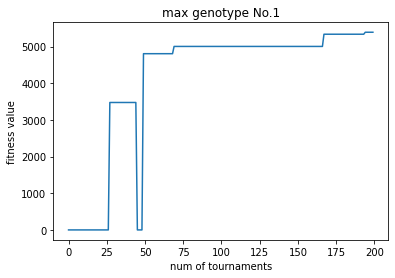

In [ ]:
# do a test with 20  individuals, 200 trails
genotypes, record = full_GA(20, 200)
max_idx = get_best(genotypes)


# plot
plt.plot(record[max_idx,:])
plt.title('max genotype No.' + str(max_idx+1))
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

# Comparisons

Vary the value of the parameters and compare their experimental results

<font color=red>params:</font> trails, mutation rate, crossover rate, num neighbour

## different num of tournaments

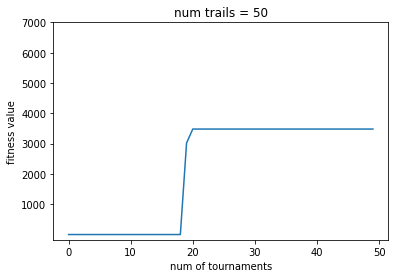

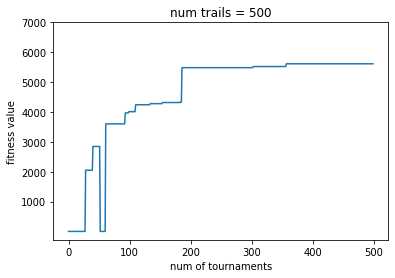

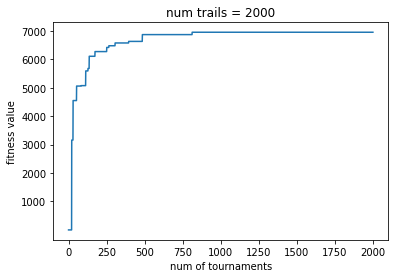

In [ ]:
# test with a low amount of trails
genotypes50, record50 = full_GA(20, 50)
max_idx50 = get_best(genotypes)

# test with a middeum amount of trails
genotypes500, record500 = full_GA(20, 500)
max_idx500 = get_best(genotypes)

# # test with a high amount of trails
genotypes2000, record2000 = full_GA(20, 2000)
max_idx2000 = get_best(genotypes)


# plot
plt.plot(record50[max_idx50,:])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('50 tournaments')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

plt.plot(record500[max_idx500,:])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('500 tournaments')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

plt.plot(record2000[max_idx2000,:])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('2000 tournaments')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

## different num of mutation rate

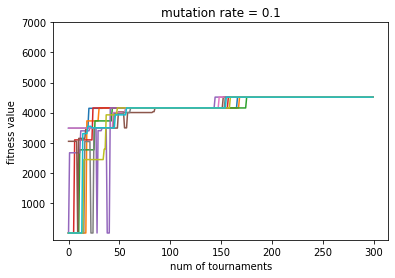

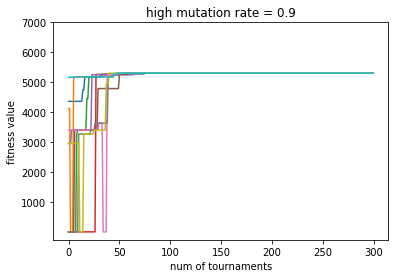

In [ ]:
# test with a low mutation rate
genotypes_a, record_a = full_GA(10, 300, prob_mutate=0.1)

# test with a high mutation rate
genotypes_b, record_b = full_GA(10, 300, prob_mutate=0.9)


# plot
for i in range(10):
  plt.plot(record_a[i])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('mutation rate = 0.1')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

for i in range(10):
  plt.plot(record_b[i])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('high mutation rate = 0.9')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

## different num of crossover rate

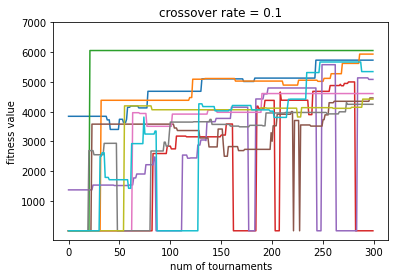

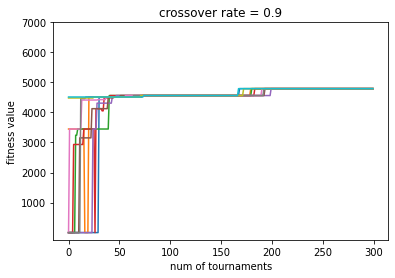

In [ ]:
# test with a low crossover rate
genotypes_a, record_a = full_GA(10, 300, prob_cross=0.1)

# test with a high crossover rate
genotypes_b, record_b = full_GA(10, 300, prob_cross=0.9)


# plot
for i in range(10):
  plt.plot(record_a[i])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('crossover rate = 0.1')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

for i in range(10):
  plt.plot(record_b[i])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('crossover rate = 0.9')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

## different num of neignbours

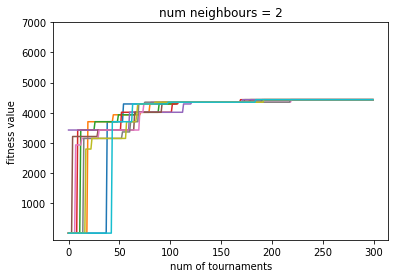

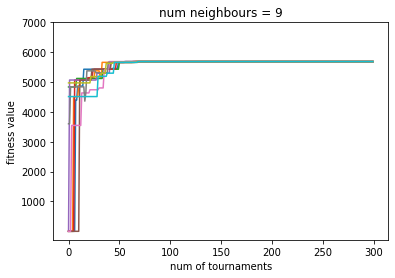

In [ ]:
# test with a low num of neighbours
genotypes_a, record_a = full_GA(10, 300, k=2)

# test with a high num of neighbours
genotypes_b, record_b = full_GA(10, 300, k=9)


# plot
for i in range(10):
  plt.plot(record_a[i])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('num neighbours = 2')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

for i in range(10):
  plt.plot(record_b[i])
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('num neighbours = 9')
plt.xlabel('num of tournaments')
plt.ylabel('fitness value')
plt.show()

#  BI & params

A plot of how the fitness of the best individual after X number of tournaments (choose an appropriate X) changes with a GA parameter of your choice (e.g mutations rate). Make sure your average over several runs and indicate both the mean and spread (standard error in the mean) of your value.

----

Two params to change with:
1. mutation rate
2. crossover rate

For each param, need to calculate:
* mean
* spread

<font color=#339933>ps. the best result here is seen as the maximum result in the last tournament</font>

In [ ]:
def get_data(num_individuals, tournaments, run, k=3, prob_mutate=0.1, prob_cross=0.9):

  full_record_average = np.zeros((run, tournaments))
  full_record_max = np.zeros((run, tournaments))
  full_record_spread = []

  for i in range(run):
    genotypes, record = full_GA(num_individuals, tournaments, k=k, prob_mutate=prob_mutate, prob_cross=prob_cross)

    # calc mean
    full_record_average[i] = np.mean(record, axis=0)

    # calc max
    full_record_max[i] = np.amax(record, axis=0)

    # simply record for calc spread
    for j in record:
      full_record_spread.append(j)
  
  # get the mean of the averages in all runs
  mean_this_rate = np.mean(full_record_average, axis=0)

  # get the mean of the maxs in all runs
  max_this_rate = np.mean(full_record_max, axis=0)

  # calc spread over all individuals
  spread = np.asarray(sem(full_record_spread))


  return mean_this_rate, max_this_rate, spread

In [ ]:
def get_max_min_idx(data_list):

  max_idx = 0
  min_idx = 0
  max = data_list[0]
  min = data_list[0]

  for idx, data in enumerate(data_list):
    if data > max:
      max = data
      max_idx = idx
    if data < min:
      min = data
      min_idx = idx

  return max_idx, min_idx

## change Mutation rate
change mutation rate from 0 to 1.0 and crossover rate unchanged

In [ ]:
mean_mutate0, max_mutate0, spread_mutate0 = get_data(20, 800, run=15, prob_mutate=0)
mean_mutate1, max_mutate1, spread_mutate1 = get_data(20, 800, run=15, prob_mutate=0.1)
mean_mutate2, max_mutate2, spread_mutate2 = get_data(20, 800, run=15, prob_mutate=0.2)
mean_mutate3, max_mutate3, spread_mutate3 = get_data(20, 800, run=15, prob_mutate=0.3)
mean_mutate4, max_mutate4, spread_mutate4 = get_data(20, 800, run=15, prob_mutate=0.4)
mean_mutate5, max_mutate5, spread_mutate5 = get_data(20, 800, run=15, prob_mutate=0.5)
mean_mutate6, max_mutate6, spread_mutate6 = get_data(20, 800, run=15, prob_mutate=0.6)
mean_mutate7, max_mutate7, spread_mutate7 = get_data(20, 800, run=15, prob_mutate=0.7)
mean_mutate8, max_mutate8, spread_mutate8 = get_data(20, 800, run=15, prob_mutate=0.8)
mean_mutate9, max_mutate9, spread_mutate9 = get_data(20, 800, run=15, prob_mutate=0.9)
mean_mutate10, max_mutate10, spread_mutate10 = get_data(20, 800, run=15, prob_mutate=1.0)

### mean & max

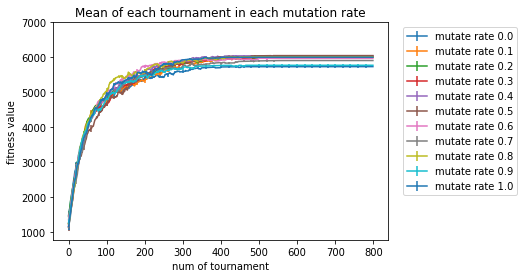


The greatest final fitness score is the line of mutation rate  0.5 ,
The least final fitness score is the line of mutation rate  0.0





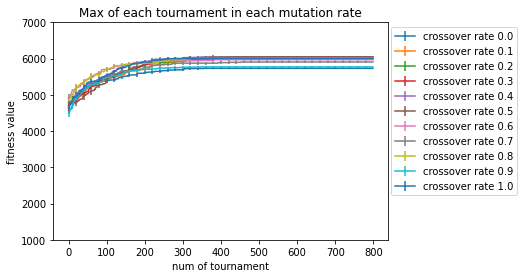


The greatest final fitness score is the line of mutation rate  0.5 ,
The least final fitness score is the line of mutation rate  0.0


In [ ]:
# Means
plt.errorbar(np.arange(0, len(mean_mutate0)), mean_mutate0, yerr=spread_mutate0, errorevery=20, label='mutate rate 0.0')
plt.errorbar(np.arange(0, len(mean_mutate1)), mean_mutate1, yerr=spread_mutate1, errorevery=20, label='mutate rate 0.1')
plt.errorbar(np.arange(0, len(mean_mutate2)), mean_mutate2, yerr=spread_mutate2, errorevery=20, label='mutate rate 0.2')
plt.errorbar(np.arange(0, len(mean_mutate3)), mean_mutate3, yerr=spread_mutate3, errorevery=20, label='mutate rate 0.3')
plt.errorbar(np.arange(0, len(mean_mutate4)), mean_mutate4, yerr=spread_mutate4, errorevery=20, label='mutate rate 0.4')
plt.errorbar(np.arange(0, len(mean_mutate5)), mean_mutate5, yerr=spread_mutate5, errorevery=20, label='mutate rate 0.5')
plt.errorbar(np.arange(0, len(mean_mutate6)), mean_mutate6, yerr=spread_mutate6, errorevery=20, label='mutate rate 0.6')
plt.errorbar(np.arange(0, len(mean_mutate7)), mean_mutate7, yerr=spread_mutate7, errorevery=20, label='mutate rate 0.7')
plt.errorbar(np.arange(0, len(mean_mutate8)), mean_mutate8, yerr=spread_mutate8, errorevery=20, label='mutate rate 0.8')
plt.errorbar(np.arange(0, len(mean_mutate9)), mean_mutate9, yerr=spread_mutate9, errorevery=20, label='mutate rate 0.9')
plt.errorbar(np.arange(0, len(mean_mutate10)), mean_mutate10, yerr=spread_mutate10, errorevery=20, label='mutate rate 1.0')

plt.legend(bbox_to_anchor=(1.05, 0, 0.35, 1))
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('Mean of each tournament in each mutation rate')
plt.xlabel('num of tournament')
plt.ylabel('fitness value')
plt.show()


final_score_mean_mutate = [mean_mutate0[-1], mean_mutate1[-1], mean_mutate2[-1], mean_mutate3[-1], mean_mutate4[-1], mean_mutate5[-1], 
              mean_mutate6[-1], mean_mutate7[-1], mean_mutate8[-1], mean_mutate9[-1], mean_mutate10[-1]]

max_idx, min_idx = get_max_min_idx(final_score_mean_mutate)

print('\nThe greatest final fitness score is the line of mutation rate ', (max_idx)/10, 
      ',\nThe least final fitness score is the line of mutation rate ', (min_idx)/10)
print('\n\n')


# Max
plt.errorbar(np.arange(0, len(max_mutate0)), max_mutate0, yerr=spread_mutate0, errorevery=20, label='crossover rate 0.0')
plt.errorbar(np.arange(0, len(max_mutate1)), max_mutate1, yerr=spread_mutate1, errorevery=20, label='crossover rate 0.1')
plt.errorbar(np.arange(0, len(max_mutate2)), max_mutate2, yerr=spread_mutate2, errorevery=20, label='crossover rate 0.2')
plt.errorbar(np.arange(0, len(max_mutate3)), max_mutate3, yerr=spread_mutate3, errorevery=20, label='crossover rate 0.3')
plt.errorbar(np.arange(0, len(max_mutate4)), max_mutate4, yerr=spread_mutate4, errorevery=20, label='crossover rate 0.4')
plt.errorbar(np.arange(0, len(max_mutate5)), max_mutate5, yerr=spread_mutate5, errorevery=20, label='crossover rate 0.5')
plt.errorbar(np.arange(0, len(max_mutate6)), max_mutate6, yerr=spread_mutate6, errorevery=20, label='crossover rate 0.6')
plt.errorbar(np.arange(0, len(max_mutate7)), max_mutate7, yerr=spread_mutate7, errorevery=20, label='crossover rate 0.7')
plt.errorbar(np.arange(0, len(max_mutate8)), max_mutate8, yerr=spread_mutate8, errorevery=20, label='crossover rate 0.8')
plt.errorbar(np.arange(0, len(max_mutate9)), max_mutate9, yerr=spread_mutate9, errorevery=20, label='crossover rate 0.9')
plt.errorbar(np.arange(0, len(max_mutate10)), max_mutate10, yerr=spread_mutate10, errorevery=20, label='crossover rate 1.0')

plt.legend(bbox_to_anchor=(1.05, 0, 0.35, 1))
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('Max of each tournament in each mutation rate')
plt.xlabel('num of tournament')
plt.ylabel('fitness value')
plt.show()


final_score_max_mutate = [max_mutate0[-1], max_mutate1[-1], max_mutate2[-1], max_mutate3[-1], max_mutate4[-1], max_mutate5[-1], 
              max_mutate6[-1], max_mutate7[-1], max_mutate8[-1], max_mutate9[-1], max_mutate10[-1]]

max_idx, min_idx = get_max_min_idx(final_score_max_mutate)

print('\nThe greatest final fitness score is the line of mutation rate ', (max_idx)/10, 
      ',\nThe least final fitness score is the line of mutation rate ', (min_idx)/10)

### spread

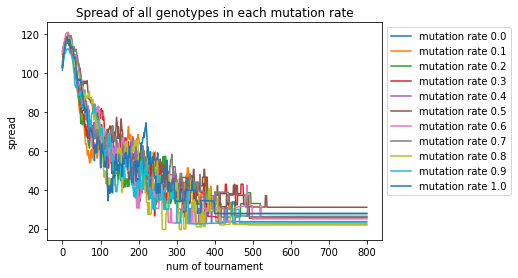

In [ ]:
plt.plot(spread_mutate0, label='mutation rate 0.0')
plt.plot(spread_mutate1, label='mutation rate 0.1')
plt.plot(spread_mutate2, label='mutation rate 0.2')
plt.plot(spread_mutate3, label='mutation rate 0.3')
plt.plot(spread_mutate4, label='mutation rate 0.4')
plt.plot(spread_mutate5, label='mutation rate 0.5')
plt.plot(spread_mutate6, label='mutation rate 0.6')
plt.plot(spread_mutate7, label='mutation rate 0.7')
plt.plot(spread_mutate8, label='mutation rate 0.8')
plt.plot(spread_mutate9, label='mutation rate 0.9')
plt.plot(spread_mutate10, label='mutation rate 1.0')

plt.legend(bbox_to_anchor=(1.05, 0, 0.35, 1))
plt.title('Spread of all genotypes in each mutation rate')
plt.xlabel('num of tournament')
plt.ylabel('spread')

plt.show()

## change Crossover rate
change mutation rate from 0 to 1.0 and crossover rate unchanged



In [ ]:
mean_cross0, max_cross0, spread_cross0 = get_data(20, 800, run=15, prob_cross=0)
mean_cross1, max_cross1, spread_cross1 = get_data(20, 800, run=15, prob_cross=0.1)
mean_cross2, max_cross2, spread_cross2 = get_data(20, 800, run=15, prob_cross=0.2)
mean_cross3, max_cross3, spread_cross3 = get_data(20, 800, run=15, prob_cross=0.3)
mean_cross4, max_cross4, spread_cross4 = get_data(20, 800, run=15, prob_cross=0.4)
mean_cross5, max_cross5, spread_cross5 = get_data(20, 800, run=15, prob_cross=0.5)
mean_cross6, max_cross6, spread_cross6 = get_data(20, 800, run=15, prob_cross=0.6)
mean_cross7, max_cross7, spread_cross7 = get_data(20, 800, run=15, prob_cross=0.7)
mean_cross8, max_cross8, spread_cross8 = get_data(20, 800, run=15, prob_cross=0.8)
mean_cross9, max_cross9, spread_cross9 = get_data(20, 800, run=15, prob_cross=0.9)
mean_cross10, max_cross10, spread_cross10 = get_data(20, 800, run=15, prob_cross=1.0)

### mean & max

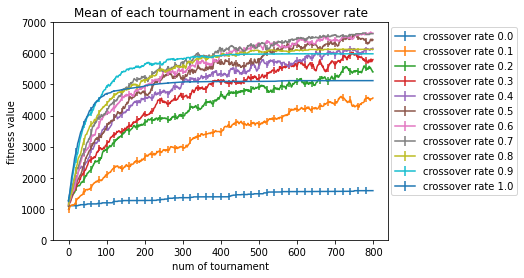


The greatest final fitness score is the line of crossover rate  0.6 ,
The least final fitness score is the line of crossover rate  0.0





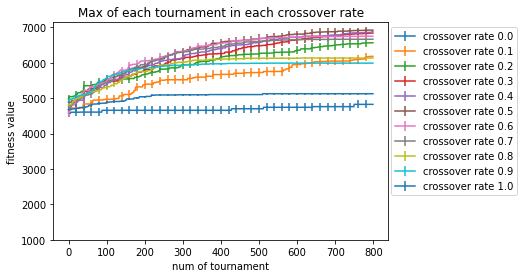


The greatest final fitness score is the line of crossover rate  0.5 ,
The least final fitness score is the line of crossover rate  0.0


In [ ]:
# Means
plt.errorbar(np.arange(0, len(mean_cross0)), mean_cross0, yerr=spread_cross0, errorevery=20, label='crossover rate 0.0')
plt.errorbar(np.arange(0, len(mean_cross1)), mean_cross1, yerr=spread_cross1, errorevery=20, label='crossover rate 0.1')
plt.errorbar(np.arange(0, len(mean_cross2)), mean_cross2, yerr=spread_cross2, errorevery=20, label='crossover rate 0.2')
plt.errorbar(np.arange(0, len(mean_cross3)), mean_cross3, yerr=spread_cross3, errorevery=20, label='crossover rate 0.3')
plt.errorbar(np.arange(0, len(mean_cross4)), mean_cross4, yerr=spread_cross4, errorevery=20, label='crossover rate 0.4')
plt.errorbar(np.arange(0, len(mean_cross5)), mean_cross5, yerr=spread_cross5, errorevery=20, label='crossover rate 0.5')
plt.errorbar(np.arange(0, len(mean_cross6)), mean_cross6, yerr=spread_cross6, errorevery=20, label='crossover rate 0.6')
plt.errorbar(np.arange(0, len(mean_cross7)), mean_cross7, yerr=spread_cross7, errorevery=20, label='crossover rate 0.7')
plt.errorbar(np.arange(0, len(mean_cross8)), mean_cross8, yerr=spread_cross8, errorevery=20, label='crossover rate 0.8')
plt.errorbar(np.arange(0, len(mean_cross9)), mean_cross9, yerr=spread_cross9, errorevery=20, label='crossover rate 0.9')
plt.errorbar(np.arange(0, len(mean_cross10)), mean_cross10, yerr=spread_cross10, errorevery=20, label='crossover rate 1.0')

plt.legend(bbox_to_anchor=(1.05, 0, 0.35, 1))
plt.yticks(np.arange(0, 8000, 1000))
plt.title('Mean of each tournament in each crossover rate')
plt.xlabel('num of tournament')
plt.ylabel('fitness value')
plt.show()


final_score_mean_cross = [mean_cross0[-1], mean_cross1[-1], mean_cross2[-1], mean_cross3[-1], mean_cross4[-1], mean_cross5[-1], 
              mean_cross6[-1], mean_cross7[-1], mean_cross8[-1], mean_cross9[-1], mean_cross10[-1]]

max_idx, min_idx = get_max_min_idx(final_score_mean_cross)

print('\nThe greatest final fitness score is the line of crossover rate ', (max_idx)/10, 
      ',\nThe least final fitness score is the line of crossover rate ', (min_idx)/10)
print('\n\n')

# Max
plt.errorbar(np.arange(0, len(max_cross0)), max_cross0, yerr=spread_cross0, errorevery=20, label='crossover rate 0.0')
plt.errorbar(np.arange(0, len(max_cross1)), max_cross1, yerr=spread_cross1, errorevery=20, label='crossover rate 0.1')
plt.errorbar(np.arange(0, len(max_cross2)), max_cross2, yerr=spread_cross2, errorevery=20, label='crossover rate 0.2')
plt.errorbar(np.arange(0, len(max_cross3)), max_cross3, yerr=spread_cross3, errorevery=20, label='crossover rate 0.3')
plt.errorbar(np.arange(0, len(max_cross4)), max_cross4, yerr=spread_cross4, errorevery=20, label='crossover rate 0.4')
plt.errorbar(np.arange(0, len(max_cross5)), max_cross5, yerr=spread_cross5, errorevery=20, label='crossover rate 0.5')
plt.errorbar(np.arange(0, len(max_cross6)), max_cross6, yerr=spread_cross6, errorevery=20, label='crossover rate 0.6')
plt.errorbar(np.arange(0, len(max_cross7)), max_cross7, yerr=spread_cross7, errorevery=20, label='crossover rate 0.7')
plt.errorbar(np.arange(0, len(max_cross8)), max_cross8, yerr=spread_cross8, errorevery=20, label='crossover rate 0.8')
plt.errorbar(np.arange(0, len(max_cross9)), max_cross9, yerr=spread_cross9, errorevery=20, label='crossover rate 0.9')
plt.errorbar(np.arange(0, len(max_cross10)), max_cross10, yerr=spread_cross10, errorevery=20, label='crossover rate 1.0')

plt.legend(bbox_to_anchor=(1.05, 0, 0.35, 1))
plt.yticks(np.arange(1000, 8000, 1000))
plt.title('Max of each tournament in each crossover rate')
plt.xlabel('num of tournament')
plt.ylabel('fitness value')
plt.show()


final_score_max_cross = [max_cross0[-1], max_cross1[-1], max_cross2[-1], max_cross3[-1], max_cross4[-1], max_cross5[-1], 
              max_cross6[-1], max_cross7[-1], max_cross8[-1], max_cross9[-1], max_cross10[-1]]

max_idx, min_idx = get_max_min_idx(final_score_max_cross)

print('\nThe greatest final fitness score is the line of crossover rate ', (max_idx)/10, 
      ',\nThe least final fitness score is the line of crossover rate ', (min_idx)/10)

### spread

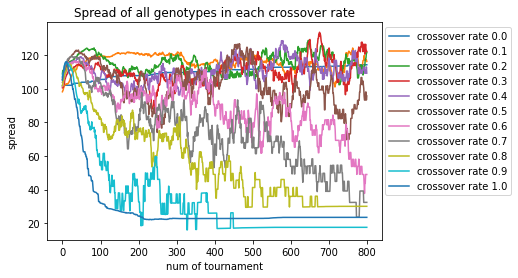

In [ ]:
plt.plot(spread_cross0, label='crossover rate 0.0')
plt.plot(spread_cross1, label='crossover rate 0.1')
plt.plot(spread_cross2, label='crossover rate 0.2')
plt.plot(spread_cross3, label='crossover rate 0.3')
plt.plot(spread_cross4, label='crossover rate 0.4')
plt.plot(spread_cross5, label='crossover rate 0.5')
plt.plot(spread_cross6, label='crossover rate 0.6')
plt.plot(spread_cross7, label='crossover rate 0.7')
plt.plot(spread_cross8, label='crossover rate 0.8')
plt.plot(spread_cross9, label='crossover rate 0.9')
plt.plot(spread_cross10, label='crossover rate 1.0')

plt.legend(bbox_to_anchor=(1.05, 0, 0.35, 1))
plt.title('Spread of all genotypes in each crossover rate')
plt.xlabel('num of tournament')
plt.ylabel('spread')

plt.show()

## change num neighbours

change the number of neighbours "k" from 2 to 10

In [ ]:
mean_k2, max_k2, spread_k2 = get_data(10, 800, run=15, k=2)
mean_k3, max_k3, spread_k3 = get_data(10, 800, run=15, k=3)
mean_k4, max_k4, spread_k4 = get_data(10, 800, run=15, k=4)
mean_k5, max_k5, spread_k5 = get_data(10, 800, run=15, k=5)
mean_k6, max_k6, spread_k6 = get_data(10, 800, run=15, k=6)
mean_k7, max_k7, spread_k7 = get_data(10, 800, run=15, k=7)
mean_k8, max_k8, spread_k8 = get_data(10, 800, run=15, k=8)
mean_k9, max_k9, spread_k9 = get_data(10, 800, run=15, k=9)
mean_k10, max_k10, spread_k10 = get_data(10, 800, run=15, k=10)

### mean & max

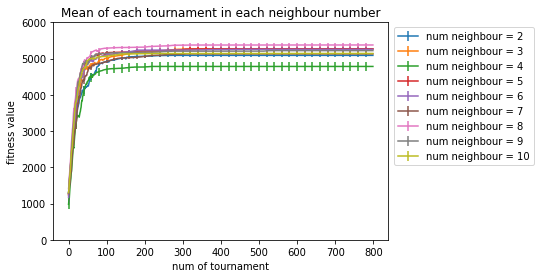


The greatest final fitness score is the line of k  8 ,
The least final fitness score is the line of k  4





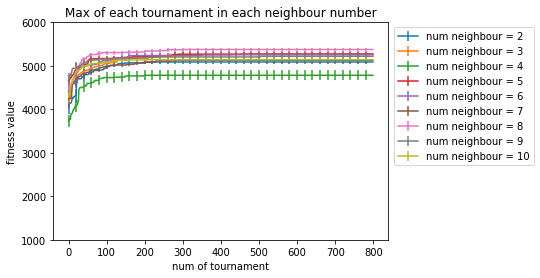


The greatest final fitness score is the line of k  8 ,
The least final fitness score is the line of k  4


In [ ]:
# Means
plt.errorbar(np.arange(0, len(mean_k2)), mean_k2, yerr=spread_k2, errorevery=20, label='num neighbour = 2')
plt.errorbar(np.arange(0, len(mean_k3)), mean_k3, yerr=spread_k3, errorevery=20, label='num neighbour = 3')
plt.errorbar(np.arange(0, len(mean_k4)), mean_k4, yerr=spread_k4, errorevery=20, label='num neighbour = 4')
plt.errorbar(np.arange(0, len(mean_k5)), mean_k5, yerr=spread_k5, errorevery=20, label='num neighbour = 5')
plt.errorbar(np.arange(0, len(mean_k6)), mean_k6, yerr=spread_k6, errorevery=20, label='num neighbour = 6')
plt.errorbar(np.arange(0, len(mean_k7)), mean_k7, yerr=spread_k7, errorevery=20, label='num neighbour = 7')
plt.errorbar(np.arange(0, len(mean_k8)), mean_k8, yerr=spread_k8, errorevery=20, label='num neighbour = 8')
plt.errorbar(np.arange(0, len(mean_k9)), mean_k9, yerr=spread_k9, errorevery=20, label='num neighbour = 9')
plt.errorbar(np.arange(0, len(mean_k10)), mean_k10, yerr=spread_k10, errorevery=20, label='num neighbour = 10')

plt.legend(bbox_to_anchor=(1.05, 0, 0.4, 1))
plt.yticks(np.arange(0, 7000, 1000))
plt.title('Mean of each tournament in each neighbour number')
plt.xlabel('num of tournament')
plt.ylabel('fitness value')
plt.show()


final_score_mean_k = [mean_k2[-1], mean_k3[-1], mean_k4[-1], mean_k5[-1], 
              mean_k6[-1], mean_k7[-1], mean_k8[-1], mean_k9[-1], mean_k10[-1]]

max_idx, min_idx = get_max_min_idx(final_score_mean_k)

print('\nThe greatest final fitness score is the line of k ', max_idx+2, 
      ',\nThe least final fitness score is the line of k ', min_idx+2)
print('\n\n')

# Max
plt.errorbar(np.arange(0, len(max_k2)), max_k2, yerr=spread_k2, errorevery=20, label='num neighbour = 2')
plt.errorbar(np.arange(0, len(max_k3)), max_k3, yerr=spread_k3, errorevery=20, label='num neighbour = 3')
plt.errorbar(np.arange(0, len(max_k4)), max_k4, yerr=spread_k4, errorevery=20, label='num neighbour = 4')
plt.errorbar(np.arange(0, len(max_k5)), max_k5, yerr=spread_k5, errorevery=20, label='num neighbour = 5')
plt.errorbar(np.arange(0, len(max_k6)), max_k6, yerr=spread_k6, errorevery=20, label='num neighbour = 6')
plt.errorbar(np.arange(0, len(max_k7)), max_k7, yerr=spread_k7, errorevery=20, label='num neighbour = 7')
plt.errorbar(np.arange(0, len(max_k8)), max_k8, yerr=spread_k8, errorevery=20, label='num neighbour = 8')
plt.errorbar(np.arange(0, len(max_k9)), max_k9, yerr=spread_k9, errorevery=20, label='num neighbour = 9')
plt.errorbar(np.arange(0, len(max_k10)), max_k10, yerr=spread_k10, errorevery=20, label='num neighbour = 10')

plt.legend(bbox_to_anchor=(1.05, 0, 0.4, 1))
plt.yticks(np.arange(1000, 7000, 1000))
plt.title('Max of each tournament in each neighbour number')
plt.xlabel('num of tournament')
plt.ylabel('fitness value')
plt.show()


final_score_max_k = [max_k2[-1], max_k3[-1], max_k4[-1], max_k5[-1], 
              max_k6[-1], max_k7[-1], max_k8[-1], max_k9[-1], max_k10[-1]]

max_idx, min_idx = get_max_min_idx(final_score_max_k)

print('\nThe greatest final fitness score is the line of k ', max_idx+2, 
      ',\nThe least final fitness score is the line of k ', min_idx+2)

### spread

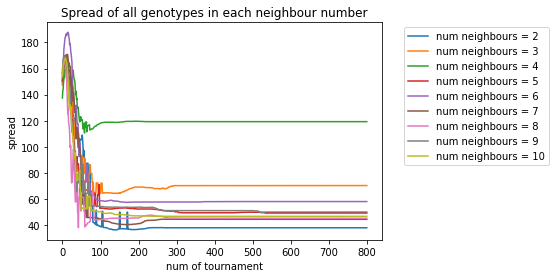

In [ ]:
plt.plot(spread_k2, label='num neighbours = 2')
plt.plot(spread_k3, label='num neighbours = 3')
plt.plot(spread_k4, label='num neighbours = 4')
plt.plot(spread_k5, label='num neighbours = 5')
plt.plot(spread_k6, label='num neighbours = 6')
plt.plot(spread_k7, label='num neighbours = 7')
plt.plot(spread_k8, label='num neighbours = 8')
plt.plot(spread_k9, label='num neighbours = 9')
plt.plot(spread_k10, label='num neighbours = 10')

plt.legend(bbox_to_anchor=(1.05, 0, 0.35, 1))
plt.title('Spread of all genotypes in each neighbour number')
plt.xlabel('num of tournament')
plt.ylabel('spread')

plt.show()